# Ex.no:5 
# Implementation-of-filter
### Name: Vincy Jovitha V
### Register no: 212223230242

Averaging Linear Filtering (adding Gaussian Noise)

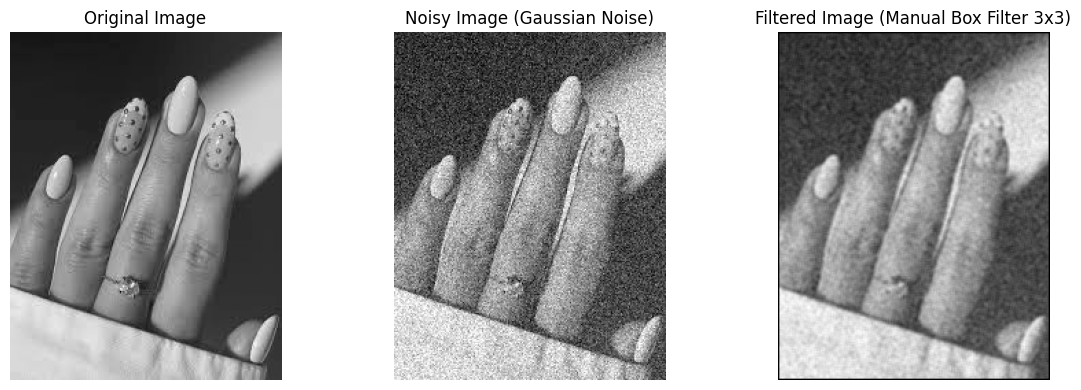

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Manually apply a 3x3 box filter
filtered_image = np.zeros_like(noisy_image)  # Create an empty output image

# Get image dimensions
height, width = noisy_image.shape

# Iterate through the image, skipping the border pixels
for i in range(1, height - 1):
    for j in range(1, width - 1):
        # Extract the 3x3 neighborhood
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        
        # Compute the mean of the neighborhood
        filtered_value = np.mean(neighborhood)
        
        # Assign the filtered value to the output image
        filtered_image[i, j] = filtered_value

# Display the images side by side using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Box Filter 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()


Averaging Linear Filtering (adding Salt and Pepper Noise)

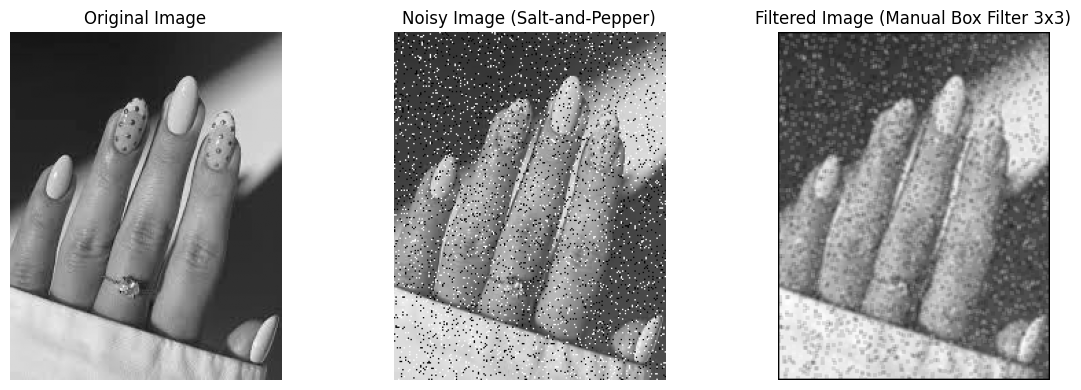

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
salt_prob = 0.05  # Probability of salt noise
pepper_prob = 0.05  # Probability of pepper noise

# Create a copy of the original image
noisy_image = np.copy(image)

# Salt noise (white pixels)
num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

# Pepper noise (black pixels)
num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# Manually apply a 3x3 box filter
filtered_image = np.zeros_like(noisy_image)  # Create an empty output image

# Get image dimensions
height, width = noisy_image.shape

# Iterate through the image, skipping the border pixels
for i in range(1, height - 1):
    for j in range(1, width - 1):
        # Extract the 3x3 neighborhood
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        
        # Compute the mean of the neighborhood
        filtered_value = np.mean(neighborhood)
        
        # Assign the filtered value to the output image
        filtered_image[i, j] = filtered_value

# Display the images side by side using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Box Filter 3x3)')
plt.axis('off')

plt.tight_layout()
plt.show()


Weighted Averaging Linear filter (Add Gaussian noise )

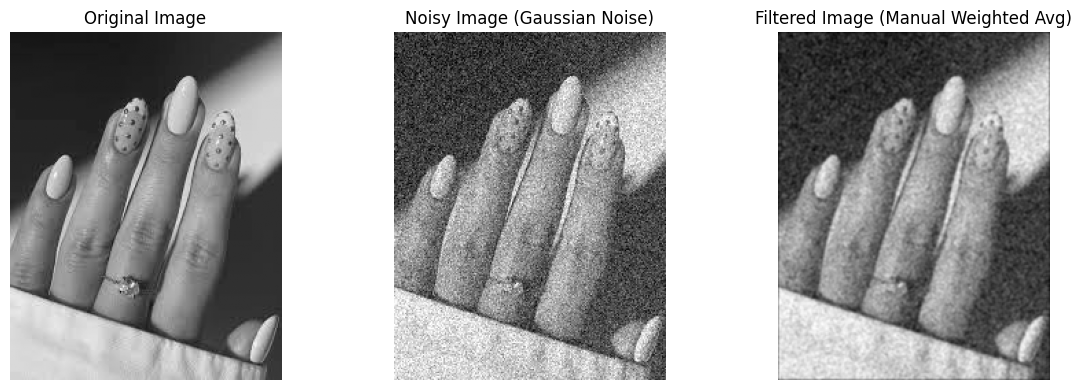

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
mean = 0
sigma = 25
gaussian_noise = np.random.normal(mean, sigma, image.shape)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# Define a 3x3 weighted average kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0  # Normalize the kernel

# Get the dimensions of the image and kernel
image_height, image_width = noisy_image.shape
kernel_size = kernel.shape[0]  # Assuming square kernel
pad = kernel_size // 2

# Create a padded image to handle the borders
padded_image = np.pad(noisy_image, pad, mode='constant', constant_values=0)

# Create an output image to store the filtered result
filtered_image = np.zeros_like(noisy_image)

# Manually apply convolution
for i in range(pad, image_height + pad):
    for j in range(pad, image_width + pad):
        # Extract the region of interest (ROI)
        roi = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
        
        # Perform element-wise multiplication and sum the result
        filtered_value = np.sum(roi * kernel)
        
        # Assign the filtered value to the output image
        filtered_image[i - pad, j - pad] = np.clip(filtered_value, 0, 255)

# Display the images side by side using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Gaussian Noise)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Weighted Avg)')
plt.axis('off')

plt.tight_layout()
plt.show()


Weighted Averaging Linear filter (Adding Salt-and-Pepper Noise )

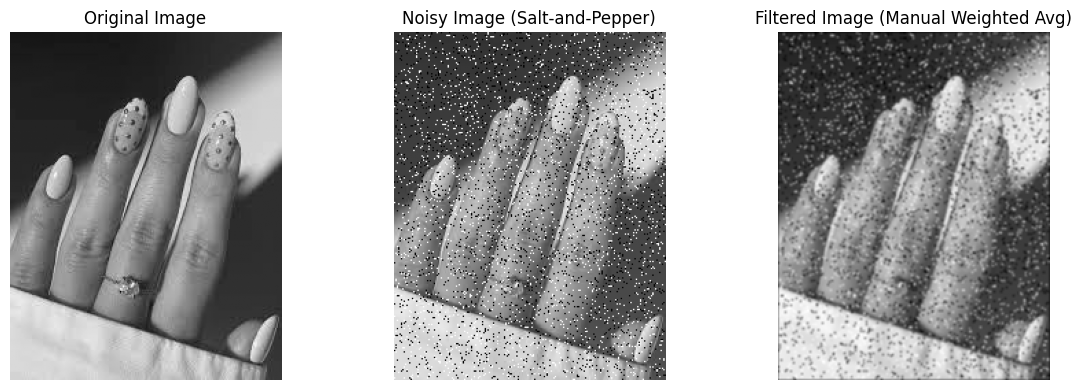

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
salt_prob = 0.05  # Probability of salt noise
pepper_prob = 0.05  # Probability of pepper noise

# Create a copy of the original image
noisy_image = np.copy(image)

# Salt noise (white pixels)
num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

# Pepper noise (black pixels)
num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# Define a 3x3 weighted average kernel
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 16.0  # Normalize the kernel

# Get the dimensions of the image and kernel
image_height, image_width = noisy_image.shape
kernel_size = kernel.shape[0]  # Assuming square kernel
pad = kernel_size // 2

# Create a padded image to handle the borders
padded_image = np.pad(noisy_image, pad, mode='constant', constant_values=0)

# Create an output image to store the filtered result
filtered_image = np.zeros_like(noisy_image)

# Manually apply convolution
for i in range(pad, image_height + pad):
    for j in range(pad, image_width + pad):
        # Extract the region of interest (ROI)
        roi = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
        
        # Perform element-wise multiplication and sum the result
        filtered_value = np.sum(roi * kernel)
        
        # Assign the filtered value to the output image
        filtered_image[i - pad, j - pad] = np.clip(filtered_value, 0, 255)

# Display the images side by side using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Weighted Avg)')
plt.axis('off')

plt.tight_layout()
plt.show()


Non-linear(Order statistics) spatial filter

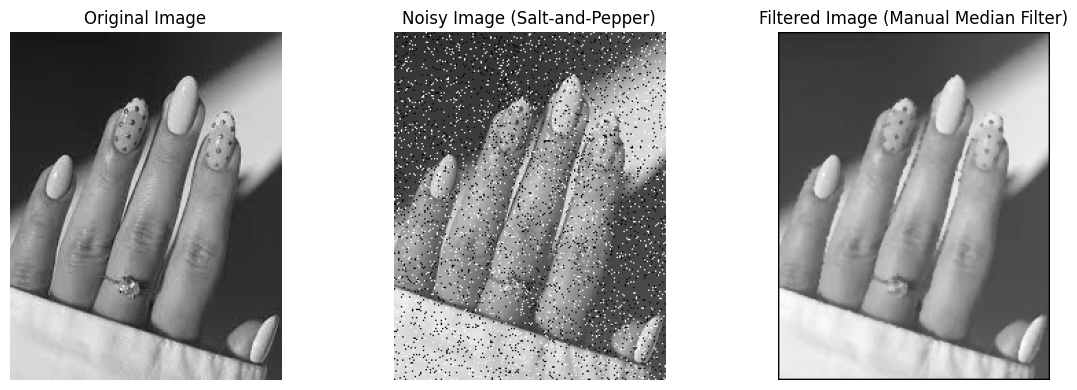

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
salt_prob = 0.05  # Probability of salt noise
pepper_prob = 0.05  # Probability of pepper noise

# Create a copy of the original image
noisy_image = np.copy(image)

# Salt noise (white pixels)
num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

# Pepper noise (black pixels)
num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# Manually apply a 3x3 median filter
filtered_image = np.zeros_like(noisy_image)  # Create an empty output image

# Get image dimensions
height, width = noisy_image.shape

# Iterate through the image, skipping the border pixels
for i in range(1, height - 1):
    for j in range(1, width - 1):
        # Extract the 3x3 neighborhood
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        
        # Flatten the neighborhood and compute the median
        median_value = np.median(neighborhood)
        
        # Assign the median value to the output image
        filtered_image[i, j] = median_value

# Display the images side by side using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Manual Median Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()


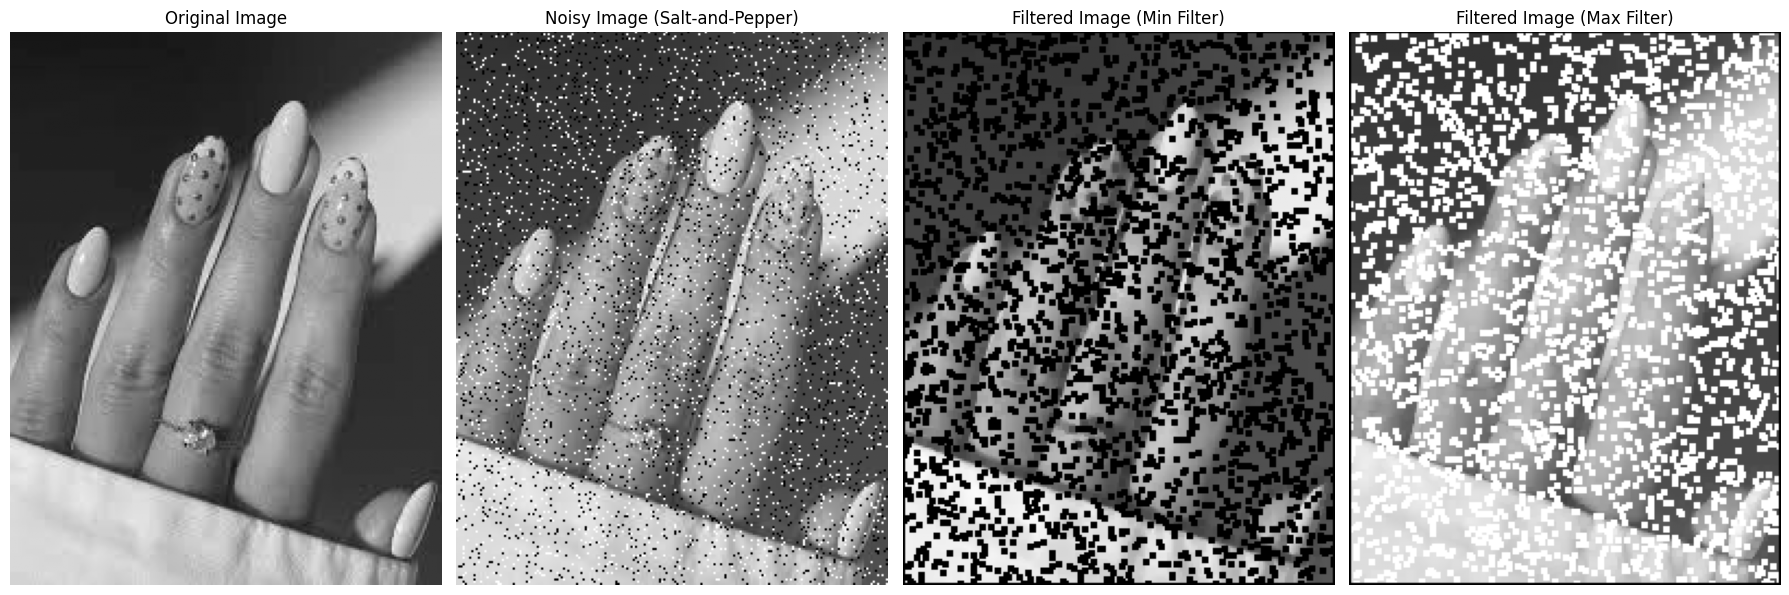

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
salt_prob = 0.05  # Probability of salt noise
pepper_prob = 0.05  # Probability of pepper noise

# Create a copy of the original image
noisy_image = np.copy(image)

# Salt noise (white pixels)
num_salt = np.ceil(salt_prob * image.size)
coords_salt = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
noisy_image[tuple(coords_salt)] = 255

# Pepper noise (black pixels)
num_pepper = np.ceil(pepper_prob * image.size)
coords_pepper = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
noisy_image[tuple(coords_pepper)] = 0

# Initialize output images
min_filtered_image = np.zeros_like(noisy_image)
max_filtered_image = np.zeros_like(noisy_image)
med_filtered_image = np.zeros_like(noisy_image)

# Get image dimensions
height, width = noisy_image.shape

# Apply filters manually
for i in range(1, height - 1):
    for j in range(1, width - 1):
        # Extract the 3x3 neighborhood
        neighborhood = noisy_image[i - 1:i + 2, j - 1:j + 2]
        
        # Compute the median value
        med_filtered_image[i, j] = np.median(neighborhood)
        
        # Compute the minimum value
        min_filtered_image[i, j] = np.min(neighborhood)
        
        # Compute the maximum value
        max_filtered_image[i, j] = np.max(neighborhood)

# Display the images side by side using Matplotlib
plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image (Salt-and-Pepper)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Filtered Image (Min Filter)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Filtered Image (Max Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()


Image Sharpening Filters

1. Laplacian Filter
A Laplacian filter is a second-order derivative filter that highlights areas of rapid intensity change. 

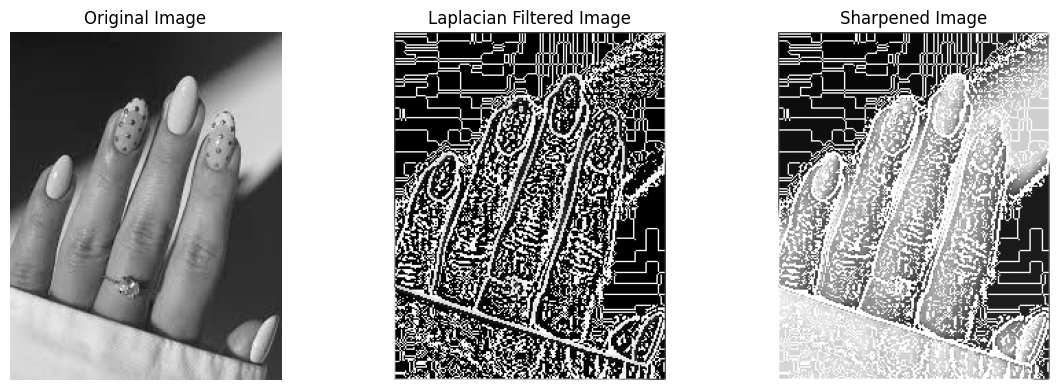

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Get image and kernel dimensions
image_height, image_width = blurred_image.shape
kernel_height, kernel_width = laplacian_kernel.shape

# Calculate padding size
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# Pad the image to handle borders
padded_image = np.pad(blurred_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

# Create an empty image for the Laplacian filter output
laplacian_image = np.zeros_like(blurred_image)

# Apply the Laplacian filter manually
for i in range(image_height):
    for j in range(image_width):
        # Extract the region of interest
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        # Apply the kernel to the region
        laplacian_value = np.sum(region * laplacian_kernel)
        # Assign the result to the output image
        laplacian_image[i, j] = laplacian_value

# Normalize Laplacian image to be in the same range as the original image
laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

# Add the original image and the Laplacian image to get the final output
sharpened_image = cv2.add(image, laplacian_image)

# Display the images side by side using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()


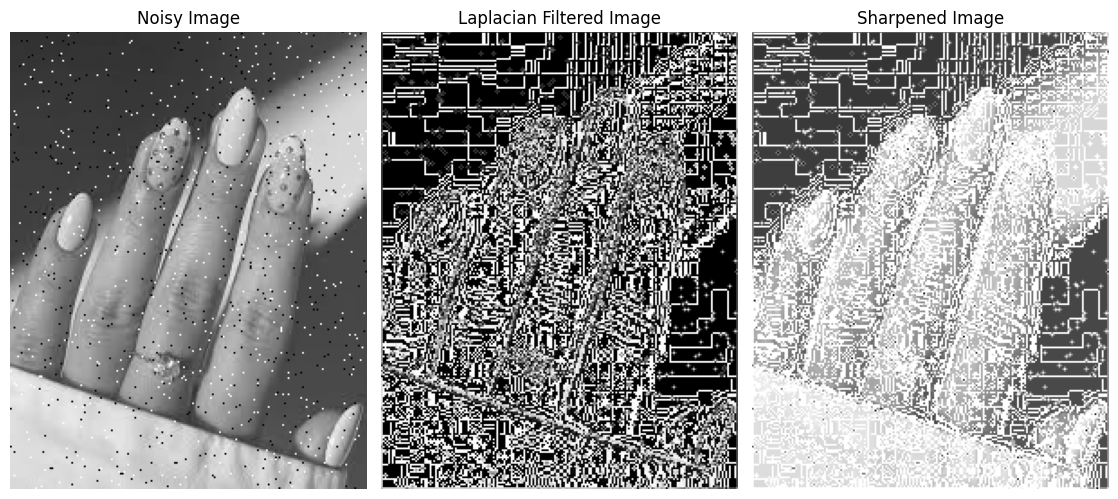

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in grayscale
image = cv2.imread('red.jpg', cv2.IMREAD_GRAYSCALE)

# Add salt-and-pepper noise to the image
amount = 0.02
noisy_image = np.copy(image)
num_salt = np.ceil(amount * image.size * 0.5)
num_pepper = np.ceil(amount * image.size * 0.5)

# Salt (white pixels)
salt_coords = [np.random.randint(0, i, int(num_salt)) for i in image.shape]
salt_coords = np.array(salt_coords).T
noisy_image[salt_coords[:, 0], salt_coords[:, 1]] = 255

# Pepper (black pixels)
pepper_coords = [np.random.randint(0, i, int(num_pepper)) for i in image.shape]
pepper_coords = np.array(pepper_coords).T
noisy_image[pepper_coords[:, 0], pepper_coords[:, 1]] = 0

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Get image and kernel dimensions
image_height, image_width = noisy_image.shape
kernel_height, kernel_width = laplacian_kernel.shape

# Calculate padding size
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# Pad the image to handle borders
padded_image = np.pad(noisy_image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

# Create an empty image for the Laplacian filter output
laplacian_image = np.zeros_like(noisy_image)

# Apply the Laplacian filter manually
for i in range(image_height):
    for j in range(image_width):
        # Extract the region of interest
        region = padded_image[i:i + kernel_height, j:j + kernel_width]
        # Apply the kernel to the region
        laplacian_value = np.sum(region * laplacian_kernel)
        # Assign the result to the output image
        laplacian_image[i, j] = laplacian_value

# Normalize Laplacian image to be in the same range as the original image
laplacian_image = np.clip(laplacian_image, 0, 255).astype(np.uint8)

# Add the noisy image and the Laplacian image to get the final output
sharpened_image = cv2.add(noisy_image, laplacian_image)

# Display the images side by side using Matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()
